In [35]:
import logging
logging.basicConfig(level=logging.DEBUG)
from collections import defaultdict

def dprint(*args, **kwargs):
#     logging.debug(*args, **kwargs)
    print(*args, **kwargs)
    

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
def createDataSet():
    group = np.array([[1.0,1.1],
                     [1.0, 1.0],
                     [0, 0],
                     [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

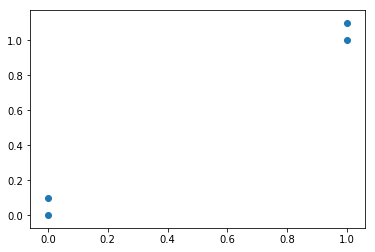

In [38]:
group, labels = createDataSet()
plt.scatter(group[:,0], group[:,1])

In [39]:
np.tile([1,2], (4,1))

array([[1, 2],
       [1, 2],
       [1, 2],
       [1, 2]])

In [40]:
a=np.array([4,5,2,1,3])
a=a.argsort()
a

array([3, 2, 4, 0, 1])

In [67]:
class KNN:
    def classify0(inX, dataSet, labels, k):
        dataSetSize = dataSet.shape[0]
        diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
        square_diff_mat = diffMat**2
        dprint(square_diff_mat)
        dis_square = square_diff_mat.sum(axis = 1)
        dprint(dis_square)
        distance = dis_square ** 0.5
        dprint(distance)
        sortedDistIndices = distance.argsort()
        dprint(sortedDistIndices)

        classCount = defaultdict(int)
        for i in range(k):
            votelabel = labels[sortedDistIndices[i]]
            classCount[votelabel] += 1
        dprint(classCount)
        classCount = sorted(classCount.items(),
                                  key=lambda p: p[1], reverse=True)
        dprint(classCount)
        return classCount[0][0]

In [68]:
inX = [0.0, 0.0]
KNN.classify0(inX, group, labels, 3)

[[1.   1.21]
 [1.   1.  ]
 [0.   0.  ]
 [0.   0.01]]
[2.21 2.   0.   0.01]
[1.48660687 1.41421356 0.         0.1       ]
[2 3 1 0]
defaultdict(<class 'int'>, {'B': 2, 'A': 1})
[('B', 2), ('A', 1)]


'B'

In [70]:
inX = [1.0, 1.2]
KNN.classify0(inX, group, labels, 3)

[[0.   0.01]
 [0.   0.04]
 [1.   1.44]
 [1.   1.21]]
[0.01 0.04 2.44 2.21]
[0.1        0.2        1.56204994 1.48660687]
[0 1 3 2]
defaultdict(<class 'int'>, {'A': 2, 'B': 1})
[('A', 2), ('B', 1)]


'A'